FINAL

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df4 = pd.read_csv('../data_clean/filtered_dataset.csv')

# Drop rows where AQI is missing
df4.dropna(subset=["AQI"], inplace=True)

# --- Feature Engineering ---
# Convert Date to datetime
df4['Date'] = pd.to_datetime(df4['Date'], errors='coerce')

# Extract datetime features
df4['Year'] = df4['Date'].dt.year
df4['Month'] = df4['Date'].dt.month
df4['Day'] = df4['Date'].dt.day
df4['DayOfWeek'] = df4['Date'].dt.dayofweek

# Extract hour directly from string-based Time
df4['Hour'] = df4['Time'].apply(lambda x: int(str(x).split(':')[0]) if pd.notnull(x) else None)

# One-hot encode AQI_Bucket (instead of LabelEncoding)
df4 = pd.get_dummies(df4, columns=['AQI_Bucket'], drop_first=True)

# Label encode city
df4['City'] = LabelEncoder().fit_transform(df4['City'].astype(str))

# Drop unused columns
df4.drop(columns=['Date', 'Time', 'Datetime'], errors='ignore', inplace=True)

# Fill missing values with column means
df4.fillna(df4.mean(numeric_only=True), inplace=True)

# Check if rows exist now
print("✅ Final row count after cleaning:", len(df4))
if len(df4) == 0:
    raise ValueError("No rows left after cleaning. Please check data quality or input file.")

# Features and target
X4 = df4.drop(columns=["AQI"])
y4 = df4["AQI"]

# Final sanity check
assert not X4.isnull().any().any(), "X4 still contains NaNs!"
assert not y4.isnull().any(), "y4 still contains NaNs!"

# Train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

✅ Final row count after cleaning: 2547900


📊 Polynomial Regression Results:
🔹 Train Accuracy (R²): 0.8783061044129546
🔹 Test Accuracy (R²): 0.8787068074224011
🔹 MAE: 22.160917082595127
🔹 MSE: 1850.6088373802131
🔹 RMSE: 43.01870334378075


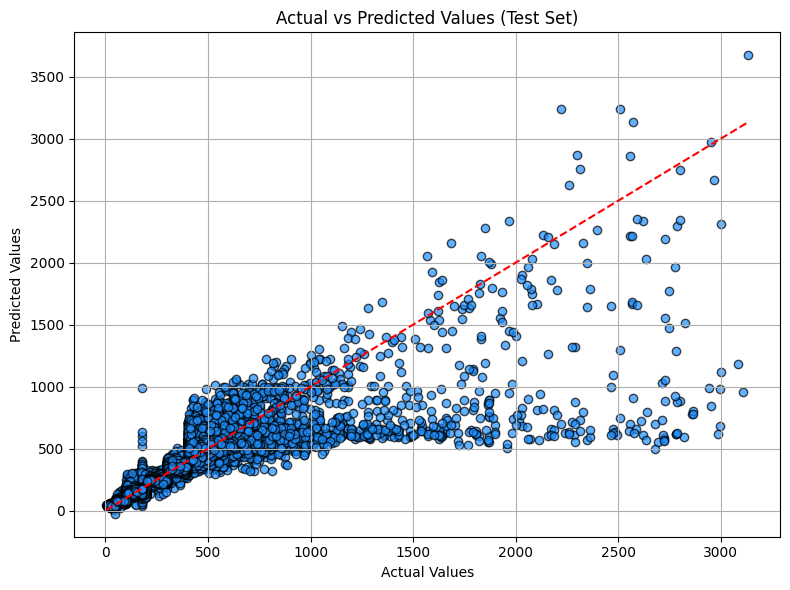

✅ Model saved as 'polynomial_regression_model.pkl'


In [10]:
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred = poly_model.predict(X4_train)
y4_test_pred = poly_model.predict(X4_test)

# Evaluation
print("📊 Polynomial Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred)))


# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()


# Save the trained model as a .pkl file
joblib.dump(poly_model, 'polynomial_regression_model.pkl')

print("✅ Model saved as 'polynomial_regression_model.pkl'")



📊 Random Forest Regression Results:
🔹 Train Accuracy (R²): 0.9930977145646991
🔹 Test Accuracy (R²): 0.9528992093445455
🔹 MAE: 11.663029717704408
🔹 MSE: 718.6317515619394
🔹 RMSE: 26.8073078014548


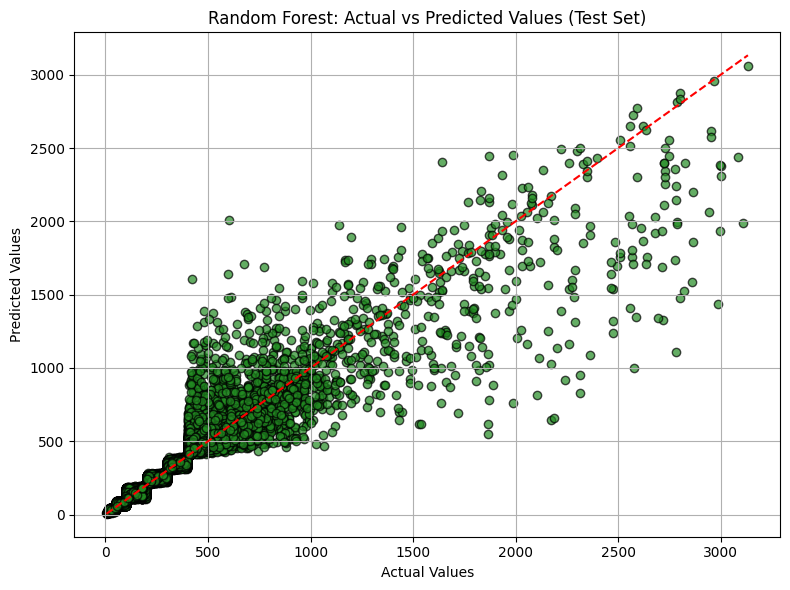

✅ Model saved as 'random_forest_model.pkl'


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_rf = rf_model.predict(X4_train)
y4_test_pred_rf = rf_model.predict(X4_test)

# Evaluation
print("📊 Random Forest Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_rf))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_rf))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_rf))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_rf))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_rf)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_rf, color='forestgreen', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Model saved as 'random_forest_model.pkl'")


📊 Random Forest (Tuned for Less Overfitting):
🔹 Train R²: 0.919798631174523
🔹 Test R²: 0.9165396396085597
🔹 MAE: 17.837439015539697
🔹 MSE: 1273.3812774572998
🔹 RMSE: 35.68446829444569


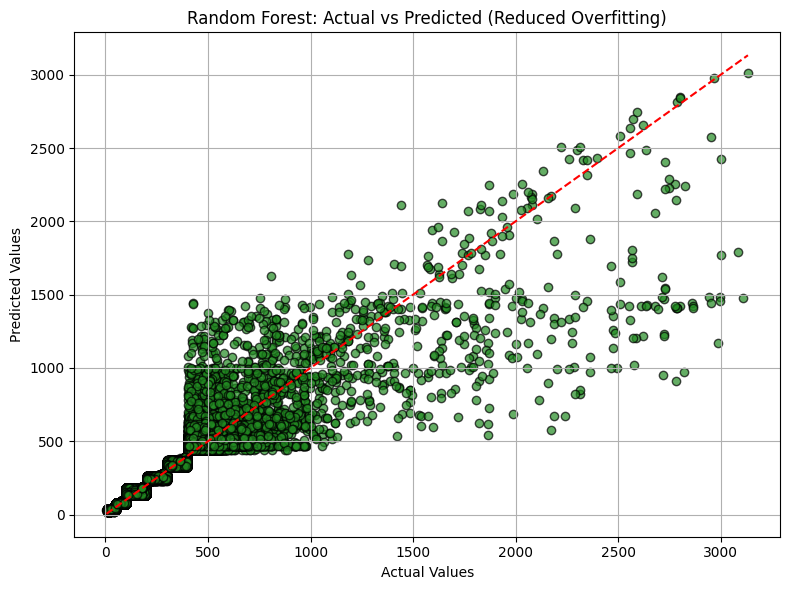

✅ Tuned model saved as 'random_forest_model_tuned.pkl'


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ Control model complexity
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,               # Limit depth of trees
    min_samples_split=10,       # Require more samples to split
    random_state=42
)
rf_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_rf = rf_model.predict(X4_train)
y4_test_pred_rf = rf_model.predict(X4_test)

# Evaluation
print("📊 Random Forest (Tuned for Less Overfitting):")
print("🔹 Train R²:", r2_score(y4_train, y4_train_pred_rf))
print("🔹 Test R²:", r2_score(y4_test, y4_test_pred_rf))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_rf))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_rf))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_rf)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_rf, color='forestgreen', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted (Reduced Overfitting)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'random_forest_model_tuned.pkl')
print("✅ Tuned model saved as 'random_forest_model_tuned.pkl'")

📊 XGBoost Regression Results:
🔹 Train Accuracy (R²): 0.9304024402018181
🔹 Test Accuracy (R²): 0.9278644695471244
🔹 MAE: 17.19439412708193
🔹 MSE: 1100.5947432688458
🔹 RMSE: 33.1752127840779


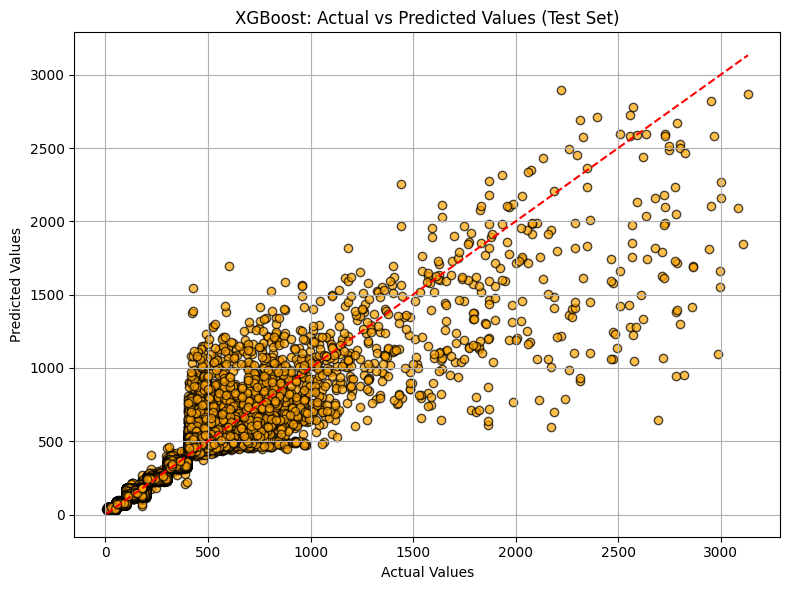

✅ Model saved as 'xgboost_model.pkl'


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_xgb = xgb_model.predict(X4_train)
y4_test_pred_xgb = xgb_model.predict(X4_test)

# Evaluation
print("📊 XGBoost Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_xgb))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_xgb))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_xgb))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_xgb))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_xgb)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_xgb, color='orange', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("✅ Model saved as 'xgboost_model.pkl'")


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

X4_train = np.array(X4_train).astype(np.float32)
X4_test = np.array(X4_test).astype(np.float32)
y4_train = np.array(y4_train).astype(np.float32)
y4_test = np.array(y4_test).astype(np.float32)

print("X4_train_lstm shape:", X4_train_lstm.shape)
print("X4_train_lstm dtype:", X4_train_lstm.dtype)
print("y4_train shape:", y4_train.shape)
print("y4_train dtype:", y4_train.dtype)

# ✅ Reshape data to 3D (samples, timesteps, features)
# Here, each sample has 1 timestep, and all features are at that timestep
X4_train_lstm = np.reshape(X4_train, (X4_train.shape[0], 1, X4_train.shape[1]))
X4_test_lstm = np.reshape(X4_test, (X4_test.shape[0], 1, X4_test.shape[1]))

# ✅ Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='tanh', input_shape=(1, X4_train.shape[1]), return_sequences=False))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1))  # Output layer for regression

lstm_model.compile(optimizer='adam', loss='mse')

# ✅ Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lstm_model.fit(
    X4_train_lstm, y4_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ✅ Predictions
y4_train_pred_lstm = lstm_model.predict(X4_train_lstm).flatten()
y4_test_pred_lstm = lstm_model.predict(X4_test_lstm).flatten()

# ✅ Evaluation
print("📊 LSTM Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_lstm))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_lstm))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_lstm))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_lstm))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_lstm)))

# ✅ Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_lstm, color='teal', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("LSTM: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Save the model
lstm_model.save('lstm_model.h5')
print("✅ LSTM model saved as 'lstm_model.h5'")

X4_train_lstm shape: (2038320, 1, 17)
X4_train_lstm dtype: float32
y4_train shape: (2038320,)
y4_train dtype: float32
Epoch 1/100


c:\Users\vikkr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50958/50958 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 8829.3789 - val_loss: 2950.4812
Epoch 2/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 3035.1846 - val_loss: 2799.5818
Epoch 3/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 2763.0039 - val_loss: 2371.1633
Epoch 4/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 2643.4443 - val_loss: 2790.4521
Epoch 5/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 2775.4431 - val_loss: 2977.6306
Epoch 6/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - loss: 2661.8799 - val_loss: 2386.6003
Epoch 7/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - loss: 2557.5120 - val_loss: 2352.9312
Epoch 8/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step - loss: 2707.7642 - val_loss: 2796.3931
Epoch 9/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 2707.1299 - val_loss: 3375.8379
Epoch 10/100
50958/50958 ━━━━━━━━━━━━━━━━━━━━ 169s 3ms/step - loss: 2681.4800 - val_loss: 2501.3315
Epoch 11/100
50958/50958 ━━━━

AttributeError: module 'matplotlib' has no attribute 'backends'

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x000001F81C4E9AB0> (for post_run_cell), with arguments args (<ExecutionResult object at 1f7e36a8df0, execution_count=9 error_before_exec=None error_in_exec=module 'matplotlib' has no attribute 'backends' info=<ExecutionInfo object at 1f7e36ab940, raw_cell="import numpy as np
import matplotlib.pyplot as plt.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Volume%20D/03%20PROGRAMMING/36_AQI_Prediction_Project/AQI_FINAL/train/01_final.ipynb#W6sZmlsZQ%3D%3D> result=None>,),kwargs {}:


AttributeError: module 'matplotlib' has no attribute 'backends'

📊 Linear Regression Results:
🔹 Train Accuracy (R²): 0.8581988203359007
🔹 Test Accuracy (R²): 0.8585053714667877
🔹 MAE: 24.129158240076087
🔹 MSE: 2158.828574306596
🔹 RMSE: 46.46319591145873


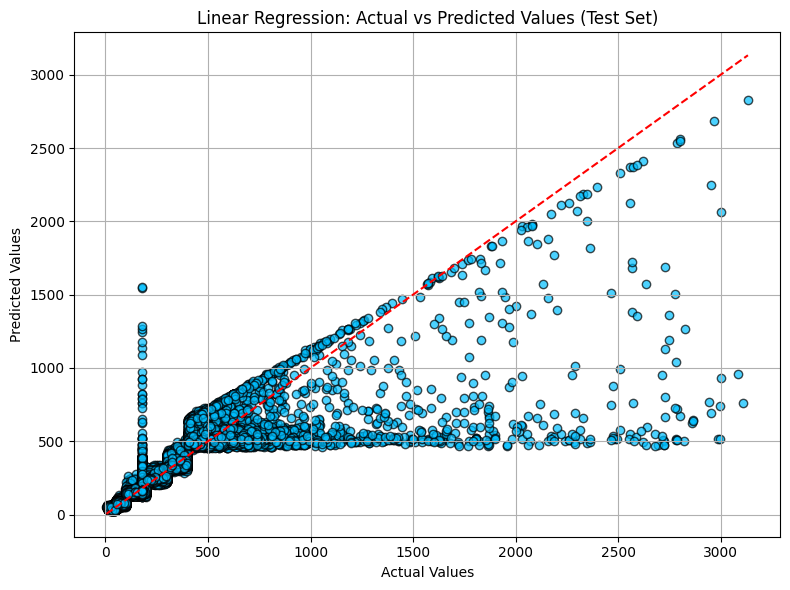

✅ Model saved as 'linear_regression_model.pkl'


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_lin = linreg_model.predict(X4_train)
y4_test_pred_lin = linreg_model.predict(X4_test)

# Evaluation
print("📊 Linear Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_lin))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_lin))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_lin))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_lin))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_lin)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_lin, color='deepskyblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(linreg_model, 'linear_regression_model.pkl')
print("✅ Model saved as 'linear_regression_model.pkl'")


📊 Lasso Regression Results:
🔹 Train Accuracy (R²): 0.8578126035636555
🔹 Test Accuracy (R²): 0.8580785215360508
🔹 MAE: 24.174824376536524
🔹 MSE: 2165.3411595331045
🔹 RMSE: 46.53322640364737


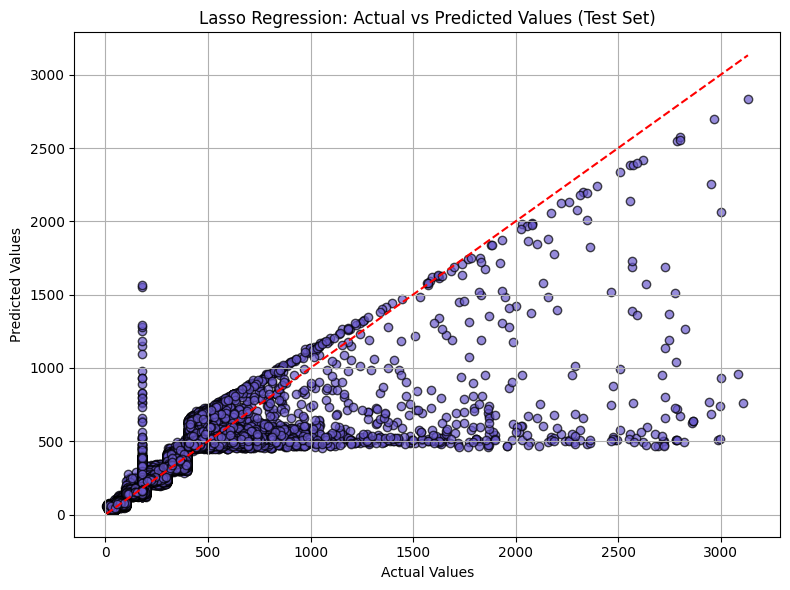

✅ Model saved as 'lasso_regression_model.pkl'


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso_model.fit(X4_train, y4_train)

# Predictions
y4_train_pred_lasso = lasso_model.predict(X4_train)
y4_test_pred_lasso = lasso_model.predict(X4_test)

# Evaluation
print("📊 Lasso Regression Results:")
print("🔹 Train Accuracy (R²):", r2_score(y4_train, y4_train_pred_lasso))
print("🔹 Test Accuracy (R²):", r2_score(y4_test, y4_test_pred_lasso))
print("🔹 MAE:", mean_absolute_error(y4_test, y4_test_pred_lasso))
print("🔹 MSE:", mean_squared_error(y4_test, y4_test_pred_lasso))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test, y4_test_pred_lasso)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y4_test_pred_lasso, color='slateblue', edgecolor='k', alpha=0.7)
plt.plot([min(y4_test), max(y4_test)], [min(y4_test), max(y4_test)], color='red', linestyle='--')
plt.title("Lasso Regression: Actual vs Predicted Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(lasso_model, 'lasso_regression_model.pkl')
print("✅ Model saved as 'lasso_regression_model.pkl'")


📊 ARIMA Model Results:
🔹 R² Score: -0.15513317218255884
🔹 MAE: 86.92928106497233
🔹 MSE: 17624.23439736293
🔹 RMSE: 132.75629701585882


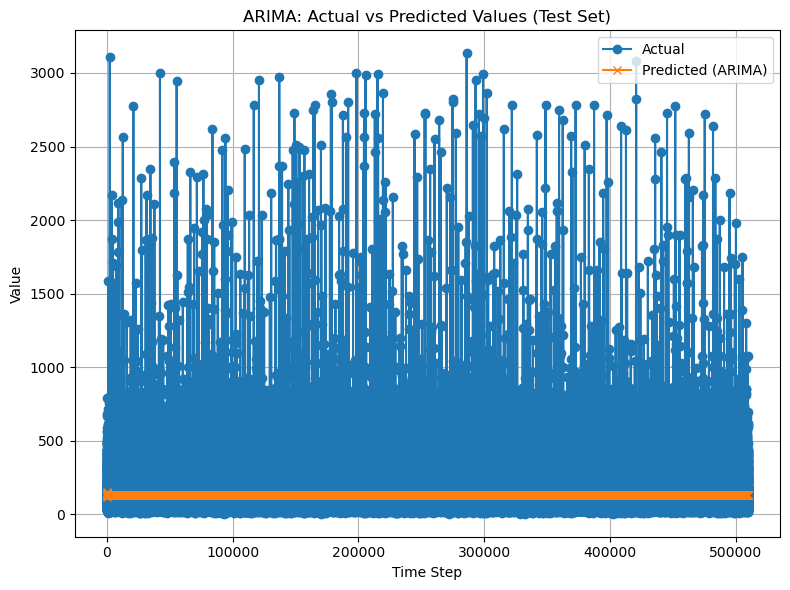

✅ ARIMA model saved as 'arima_model.pkl'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Make sure your y4_train and y4_test are time series (Pandas Series)
# If not, convert:
y4_train_series = pd.Series(y4_train).reset_index(drop=True)
y4_test_series = pd.Series(y4_test).reset_index(drop=True)

# Fit ARIMA model (order can be tuned; here p=5, d=1, q=0 as an example)
arima_model = ARIMA(y4_train_series, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecasting for test set length
y4_test_pred_arima = arima_result.forecast(steps=len(y4_test_series))

# Evaluation
print("📊 ARIMA Model Results:")
print("🔹 R² Score:", r2_score(y4_test_series, y4_test_pred_arima))
print("🔹 MAE:", mean_absolute_error(y4_test_series, y4_test_pred_arima))
print("🔹 MSE:", mean_squared_error(y4_test_series, y4_test_pred_arima))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y4_test_series, y4_test_pred_arima)))

# Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(y4_test_series.values, label='Actual', marker='o')
plt.plot(y4_test_pred_arima.values, label='Predicted (ARIMA)', marker='x')
plt.title("ARIMA: Actual vs Predicted Values (Test Set)")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained ARIMA model
joblib.dump(arima_result, 'arima_model.pkl')
print("✅ ARIMA model saved as 'arima_model.pkl'")
